In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Operacje logiczne
arr = np.array([3,8,1,10,5,7])

mask = np.logical_and(arr > 5, arr <10)
mask_or= np.logical_or(arr > 5, arr <10)

print(arr[mask])
print(arr[mask_or])

mask_not = np.logical_not(arr > 5)
print(arr[mask_not])

[8 7]
[ 3  8  1 10  5  7]
[3 1 5]


In [6]:
#Sortowanie
arr = np.array([12,3,7,5,8,2,9])
sorted_arr = np.sort(arr)
print(sorted_arr)
args = np.argsort(arr)
print(args)

[ 2  3  5  7  8  9 12]
[5 1 3 2 4 6 0]


In [17]:
#unikalne wartości
t = np.array([4,7,2,4,7,1,1,7])
u_values = np.unique(t)
print(u_values)

wystapienia = np.bincount(t)
for i, z in enumerate(wystapienia):
    print(f"Wartość: {i}:{z}razy")

[1 2 4 7]
Wartość: 0:0razy
Wartość: 1:2razy
Wartość: 2:1razy
Wartość: 3:0razy
Wartość: 4:2razy
Wartość: 5:0razy
Wartość: 6:0razy
Wartość: 7:3razy


In [14]:
#Zadanie łączące
tab = np.random.randint(low=1, high=21, size=(4,5))
mask = np.logical_and(tab > 10, tab%2==0)
checked = tab[mask]
print(checked)

col_sorted = np.sort(tab, axis=0)
print(col_sorted)

uniques = np.unique(tab, axis=0)
print(uniques)

[14 14 18]
[[ 7  4  4  5  2]
 [ 9  5 11  5 13]
 [10 11 14  6 13]
 [17 13 18 19 14]]
[[ 7 11 18 19 13]
 [ 9 13 11  5 13]
 [10  5  4  6  2]
 [17  4 14  5 14]]


In [20]:
np.random.seed(42)
regions = ['North', 'South', 'East', 'West']
stores = ['Store_A', 'Store_B', 'Store_C', 'Store_D', 'Store_E']

data = pd.DataFrame({
    'Store': np.random.choice(stores, size=20),
    'Region': np.random.choice(regions, size=20),
    'Sales': np.random.randint(2000, 5000, size=20)
})
print(data.head(2))

     Store Region  Sales
0  Store_D  South   3899
1  Store_E  South   3267


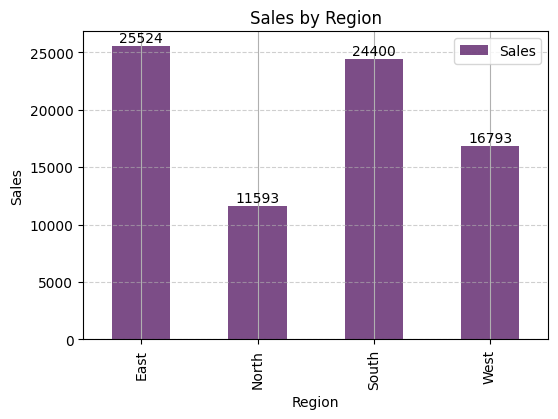

In [39]:
total_sales = data.groupby("Region")["Sales"].sum()

total_sales.plot(kind='bar', figsize=(6,4), title="Sales by Region", colormap='viridis', grid=True, alpha=0.7, legend=True)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.grid(axis='y', linestyle="--", alpha=0.6)
for i, value in enumerate(total_sales):
    plt.text(i, value + 100, f"{value}", ha='center', va='bottom', fontsize=10)

In [40]:
#Store Region  Sales
pivot = data.pivot_table(values="Sales", columns="Region", index="Store", aggfunc="sum", fill_value=0)
print(pivot)

Region    East  North  South  West
Store                             
Store_A      0      0   3363     0
Store_B      0   4068   4824  2241
Store_C  12399   4879      0  4363
Store_D   8180      0   8511  2600
Store_E   4945   2646   7702  7589


In [41]:
pivot.style.background_gradient(cmap="viridis").set_properties(**{'font-size': '14px'})

Region,East,North,South,West
Store,,,,
Store_A,0,0,3363,0
Store_B,0,4068,4824,2241
Store_C,12399,4879,0,4363
Store_D,8180,0,8511,2600
Store_E,4945,2646,7702,7589


In [45]:
store_a = data[data["Store"] == "Store_A"]
store_b = data[data["Store"] == "Store_B"]


,Store,Region,Sales
5,Store_B,North,4068
13,Store_B,West,2241
15,Store_B,South,4824


     Store_A  Store_B  Store_C  Store_D  Store_E
Jan     2860     3294     3130     3095     3638
Feb     4169     2466     3238     2330     3482
Mar     4135     4919     2130     3685     2769
Apr     4391     3515     4853     4433     3215
May     2955     4324     3184     2459     2021
Jun     4300     2747     4904     2474     3082


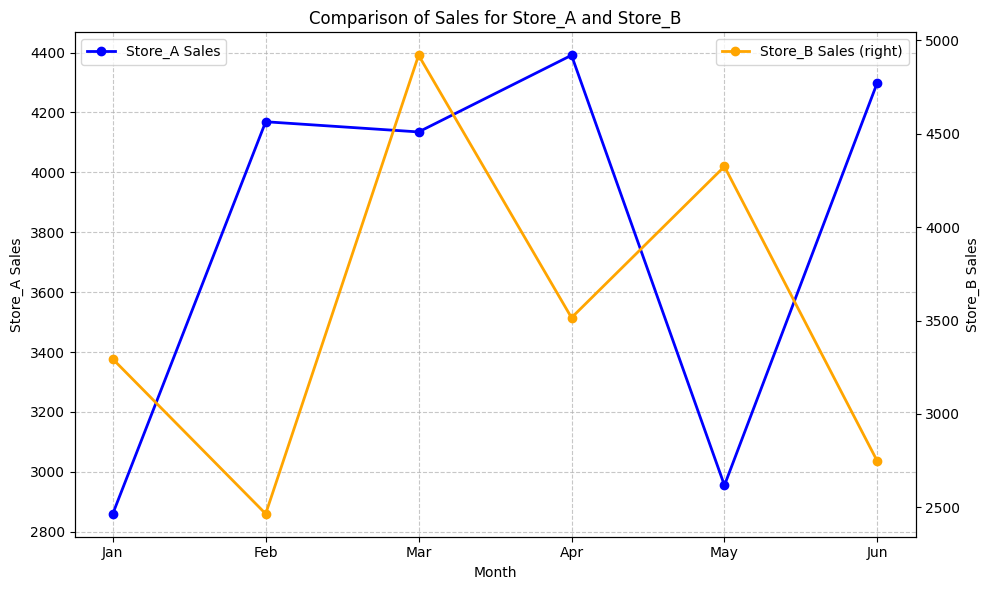

In [ ]:


np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
stores = ['Store_A', 'Store_B', 'Store_C', 'Store_D', 'Store_E']


data = pd.DataFrame(
    np.random.randint(2000, 5000, size=(6, 5)),  # Losowe dane sprzedaży
    index=months,  # Miesiące jako indeks
    columns=stores  # Nazwy sklepów jako kolumny
)

print(data)  # Sprawdzenie, czy kolumny istnieją

# Wybór danych dla Store_A i Store_B
if "Store_A" in data.columns and "Store_B" in data.columns:
    store_a = data["Store_A"]
    store_b = data["Store_B"]
else:
    print("Kolumny Store_A i Store_B nie istnieją w danych!")

# Tworzenie wykresu
ax = store_a.plot(
    figsize=(10, 6),
    linewidth=2,
    marker='o',
    color='blue',
    label='Store_A Sales',
    title="Comparison of Sales for Store_A and Store_B"
)

# Dodanie Store_B na osobnej osi Y
store_b.plot(
    secondary_y=True,
    linewidth=2,
    marker='o',
    color='orange',
    label='Store_B Sales',
    ax=ax
)

# Dodanie etykiet i legendy
ax.set_xlabel("Month")
ax.set_ylabel("Store_A Sales")
ax.right_ax.set_ylabel("Store_B Sales")
ax.grid(visible=True, linestyle="--", alpha=0.7)
ax.legend(loc="upper left")
ax.right_ax.legend(loc="upper right")

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

